In [1]:
%matplotlib inline  

In [1]:
import keras
import numpy as np
from keras.preprocessing import image, sequence

Using TensorFlow backend.


In [2]:
batch_size = 10

In [3]:
gen = image.ImageDataGenerator()
train = gen.flow_from_directory('/run/media/backman/yay/dogbreedKeras/train', target_size=(224,224),
            class_mode="categorical", shuffle=True, batch_size=batch_size)
valid = gen.flow_from_directory('/run/media/backman/yay/dogbreedKeras/valid', target_size=(224,224),
            class_mode="categorical", shuffle=False, batch_size=batch_size)


Found 9862 images belonging to 120 classes.
Found 360 images belonging to 120 classes.


In [4]:
model = keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape = (224,224,3))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        input_1[0][0]                    
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 112, 112, 64)  0           bn_conv1[0][0]                   
___________________________________________________________________________________________

In [5]:
len(train.class_indices)

120

In [6]:
for layer in model.layers: layer.trainable=False
last = model.output
x = keras.layers.Flatten()(last)
x = keras.layers.Dense(len(train.class_indices), activation='softmax')(x)
model = keras.models.Model(model.input, x)


In [7]:
model.compile(optimizer=keras.optimizers.Adam(1e-8),
       loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
len(train.filenames)

9862

In [9]:
model.fit_generator(
        train,
        steps_per_epoch = len(train.filenames) / batch_size,
        epochs=1,
        validation_data=valid,
        validation_steps = len(valid.filenames)/batch_size)

Epoch 1/1
987/986 [==============================] - 98s - loss: 0.1084 - acc: 0.9694 - val_loss: 3.4366 - val_acc: 0.5778


In [10]:
model.optimizer.lr=1e-5

In [11]:
model.fit_generator(
        train,
        steps_per_epoch = len(train.filenames) / batch_size,
        epochs=5,
        validation_data=valid,
        validation_steps = len(valid.filenames)/batch_size)

Epoch 1/5
987/986 [==============================] - 86s - loss: 1.0541 - acc: 0.6931 - val_loss: 2.0304 - val_acc: 0.5278
Epoch 2/5
987/986 [==============================] - 85s - loss: 0.8540 - acc: 0.7421 - val_loss: 2.1047 - val_acc: 0.5167
Epoch 3/5
987/986 [==============================] - 85s - loss: 0.7041 - acc: 0.7874 - val_loss: 2.2322 - val_acc: 0.5139
Epoch 4/5
987/986 [==============================] - 85s - loss: 0.5825 - acc: 0.8176 - val_loss: 2.5321 - val_acc: 0.5083
Epoch 5/5
987/986 [==============================] - 85s - loss: 0.5176 - acc: 0.8365 - val_loss: 2.2196 - val_acc: 0.5417


In [26]:
model.optimizer.lr=1e-27

In [27]:
model.fit_generator(
        train,
        steps_per_epoch = len(train.filenames) / batch_size,
        epochs=5,
        validation_data=valid,
        validation_steps = len(valid.filenames)/batch_size)

Epoch 1/5
 19/986 [..............................] - ETA: 325s - loss: 7.1500 - acc: 0.2053

KeyboardInterrupt: 

In [14]:
model.optimizer.lr=1e-8

In [15]:
model.fit_generator(
        train,
        steps_per_epoch = len(train.filenames) / batch_size,
        epochs=30,
        validation_data=valid,
        validation_steps = len(valid.filenames)/batch_size)

Epoch 1/30
987/986 [==============================] - 85s - loss: 0.3101 - acc: 0.9026 - val_loss: 2.4794 - val_acc: 0.5639
Epoch 2/30
987/986 [==============================] - 87s - loss: 0.2754 - acc: 0.9123 - val_loss: 2.4979 - val_acc: 0.5611
Epoch 3/30
987/986 [==============================] - 90s - loss: 0.2736 - acc: 0.9132 - val_loss: 2.3871 - val_acc: 0.5889
Epoch 4/30
987/986 [==============================] - 90s - loss: 0.2593 - acc: 0.9147 - val_loss: 2.4455 - val_acc: 0.5778
Epoch 5/30
987/986 [==============================] - 90s - loss: 0.2461 - acc: 0.9185 - val_loss: 2.5017 - val_acc: 0.5889
Epoch 6/30
987/986 [==============================] - 89s - loss: 0.2392 - acc: 0.9235 - val_loss: 2.7433 - val_acc: 0.5583
Epoch 7/30
987/986 [==============================] - 86s - loss: 0.2404 - acc: 0.9221 - val_loss: 2.7659 - val_acc: 0.5583
Epoch 8/30
987/986 [==============================] - 86s - loss: 0.2008 - acc: 0.9362 - val_loss: 2.6253 - val_acc: 0.5694
Epoch 9/

In [10]:
test = gen.flow_from_directory('/run/media/backman/yay/dogbreedKeras/test', target_size=(224,224),
            class_mode="categorical", shuffle=False, batch_size=batch_size)


Found 10357 images belonging to 1 classes.


In [11]:
pred = model.predict_generator(test, len(test.filenames) / batch_size)


In [12]:
ids = np.array([f.replace('.jpg','').replace('0/','') for f in test.filenames])


In [13]:
ids.shape

(10357,)

In [14]:
pred[0]

array([  9.67489670e-21,   9.24166788e-09,   1.05985129e-27,
         1.45880585e-10,   1.01147762e-15,   5.01896903e-19,
         1.90593076e-19,   3.73041945e-20,   4.66177354e-17,
         3.11174295e-17,   3.79778378e-08,   1.84458785e-11,
         1.29957907e-25,   2.56023241e-12,   9.54880885e-20,
         1.26271924e-15,   1.31065246e-16,   5.18587316e-14,
         7.88026535e-20,   3.66165302e-16,   6.20058558e-17,
         1.95528821e-17,   9.09223165e-20,   2.35212511e-14,
         9.40596139e-14,   9.12899223e-22,   6.97481840e-13,
         3.93354728e-19,   2.23025099e-17,   2.01471005e-17,
         1.11649683e-11,   3.35647898e-11,   1.40928239e-01,
         4.34572901e-18,   1.97410434e-20,   2.73756566e-04,
         3.74274825e-28,   7.51891021e-21,   1.94064740e-19,
         2.24237208e-18,   4.10713698e-15,   1.39416544e-17,
         2.40549938e-21,   9.61707425e-09,   1.07399840e-27,
         1.23703519e-23,   1.14629454e-22,   9.97897456e-19,
         5.27278306e-15,

In [15]:
pred[0].shape

(120,)

In [16]:
stackedPredictions = np.hstack((ids[:, np.newaxis],pred))

In [17]:
stackedPredictions.shape

(10357, 121)

In [18]:
import pandas as pd

In [19]:
head = [key for key in train.class_indices.keys()]

In [20]:
pd.DataFrame(stackedPredictions).to_csv('/home/backman/Downloads/submission.csv', index=False, header=['id']+head)

In [27]:
model.save_weights('dogs.h5')

In [8]:
model.load_weights('dogs.h5')

In [240]:
pred = model.predict_generator(valid, steps = len(valid.filenames) / batch_size)

In [241]:
valid.filenames[0]

'affenpinscher/e4a2121c2de5de095855677d4e6eca71.jpg'

In [242]:
pred

array([[  9.99721467e-01,   1.35784287e-10,   5.28827416e-13, ...,
          2.46334536e-10,   1.33939891e-15,   8.98904701e-11],
       [  2.33224400e-05,   4.29861252e-13,   3.01354744e-19, ...,
          7.63720798e-16,   1.09582569e-15,   1.50763348e-03],
       [  1.00000000e+00,   3.99238852e-19,   1.24544928e-25, ...,
          2.94384311e-22,   3.99010917e-17,   2.12229951e-12],
       ..., 
       [  2.56548775e-11,   3.82264602e-07,   7.36792355e-14, ...,
          7.90384400e-14,   7.16126724e-12,   2.23177031e-01],
       [  2.05794599e-08,   5.22006585e-15,   6.60053843e-24, ...,
          1.13815354e-17,   2.57910143e-12,   3.38992536e-01],
       [  1.58294313e-06,   3.82613472e-12,   3.56524214e-15, ...,
          9.34052125e-09,   4.96541119e-08,   4.30960608e-05]], dtype=float32)

In [243]:
pred = np.argmax(pred, axis=1)

In [244]:
pred[0]

0

In [245]:
pred.shape

(360,)

In [246]:
correct = valid.classes

In [247]:
correct[0]

0

In [248]:
import matplotlib.pyplot as plt
from PIL import Image


In [249]:
c = np.where(correct == pred)

In [250]:
c

(array([  0,   2,   3,   4,   5,   6,   7,   9,  10,  14,  19,  20,  21,
         22,  24,  27,  28,  30,  31,  33,  34,  35,  37,  38,  39,  40,
         42,  43,  44,  50,  53,  55,  56,  59,  60,  61,  64,  65,  66,
         67,  68,  70,  74,  75,  76,  79,  80,  81,  82,  83,  86,  88,
         89,  91,  93,  94,  97,  99, 100, 102, 103, 104, 105, 108, 109,
        110, 113, 114, 115, 116, 117, 119, 121, 122, 124, 125, 126, 128,
        132, 133, 134, 135, 136, 137, 140, 141, 143, 145, 146, 153, 154,
        156, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172,
        175, 176, 177, 180, 182, 183, 184, 185, 186, 187, 188, 191, 192,
        193, 194, 196, 197, 199, 200, 201, 202, 203, 206, 207, 208, 209,
        214, 220, 222, 223, 226, 227, 229, 231, 232, 234, 239, 240, 241,
        242, 246, 247, 248, 249, 250, 254, 255, 256, 257, 258, 260, 262,
        263, 265, 267, 271, 272, 276, 278, 279, 282, 286, 289, 290, 291,
        292, 293, 295, 299, 301, 307, 312, 314, 317

In [251]:
def plots_idx(idx, titles=None):
    return [ image.load_img('/run/media/backman/yay/dogbreedKeras/valid/' + valid.filenames[i]) for i in idx] 

In [252]:
idx = np.random.permutation(c[0])[:5]
print(idx)
imgs = plots_idx(idx, pred[idx])

[249 125 229 301  61]


In [253]:
f = plt.figure()
imgs
print((correct[18], pred[18]))

(6, 119)


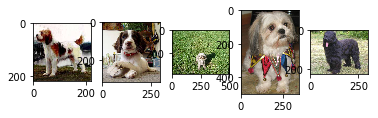

In [254]:
for i in range(len(imgs)):
    plt.subplot(1*100 + len(imgs) * 10 + i+1)
    plt.imshow(imgs[i])

plt.show()

In [255]:
c = np.where(correct != pred)

In [261]:
idx = np.random.permutation(c[0])[:5]
print(idx)
imgs = plots_idx(idx, pred[idx])

[266 356 230   8 274]


In [262]:
f = plt.figure(figsize=(12,6))
imgs
print((correct[18], pred[18]))

(6, 119)


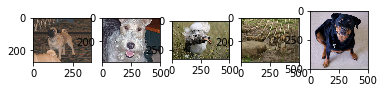

In [263]:
for i in range(len(imgs)):
    plt.subplot(1*100 + len(imgs) * 10 + i+1)
    plt.imshow(imgs[i])

plt.show()

In [ ]:
gen_ar = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True,)
train = gen_ar.flow_from_directory('/run/media/backman/yay/dogbreedKeras/train', target_size=(224,224),
            class_mode="categorical", shuffle=True, batch_size=batch_size, )


In [268]:
model.fit_generator(
        train,
        steps_per_epoch = len(train.filenames) / batch_size,
        epochs=2,
        validation_data=valid,
        validation_steps = len(valid.filenames)/batch_size)

Epoch 1/2
987/986 [==============================] - 97s - loss: 0.8820 - acc: 0.7912 - val_loss: 3.1473 - val_acc: 0.5500
Epoch 2/2
987/986 [==============================] - 95s - loss: 0.7248 - acc: 0.8214 - val_loss: 3.1097 - val_acc: 0.5528


In [ ]:
model.optimizer.lr=1e-4

In [30]:
model.fit_generator(
        train,
        steps_per_epoch = len(train.filenames) / batch_size,
        epochs=2,
        validation_data=valid,
        validation_steps = len(valid.filenames)/batch_size)

Epoch 1/2
 20/986 [..............................] - ETA: 321s - loss: 5.6951 - acc: 0.1900

KeyboardInterrupt: 

In [29]:
model.optimizer.lr=1e-8

In [272]:
model.fit_generator(
        train,
        steps_per_epoch = len(train.filenames) / batch_size,
        epochs=10,
        validation_data=valid,
        validation_steps = len(valid.filenames)/batch_size)

Epoch 1/10
987/986 [==============================] - 96s - loss: 0.6370 - acc: 0.8383 - val_loss: 3.0025 - val_acc: 0.5694
Epoch 2/10
987/986 [==============================] - 95s - loss: 0.6382 - acc: 0.8368 - val_loss: 3.0431 - val_acc: 0.5778
Epoch 3/10
987/986 [==============================] - 96s - loss: 0.6169 - acc: 0.8386 - val_loss: 3.0516 - val_acc: 0.5722
Epoch 4/10
987/986 [==============================] - 96s - loss: 0.5861 - acc: 0.8501 - val_loss: 3.0780 - val_acc: 0.5278
Epoch 5/10
987/986 [==============================] - 94s - loss: 0.5833 - acc: 0.8475 - val_loss: 2.9534 - val_acc: 0.5917
Epoch 6/10
987/986 [==============================] - 95s - loss: 0.5671 - acc: 0.8501 - val_loss: 2.8711 - val_acc: 0.5778
Epoch 7/10
987/986 [==============================] - 92s - loss: 0.5664 - acc: 0.8503 - val_loss: 2.9572 - val_acc: 0.5556
Epoch 8/10
987/986 [==============================] - 92s - loss: 0.5295 - acc: 0.8572 - val_loss: 3.0358 - val_acc: 0.5611
Epoch 9/

In [273]:
model.optimizer.lr=1e-4

In [274]:
model.fit_generator(
        train,
        steps_per_epoch = len(train.filenames) / batch_size,
        epochs=10,
        validation_data=valid,
        validation_steps = len(valid.filenames)/batch_size)

Epoch 1/10
987/986 [==============================] - 86s - loss: 0.5299 - acc: 0.8608 - val_loss: 3.3512 - val_acc: 0.5667
Epoch 2/10
987/986 [==============================] - 85s - loss: 0.5351 - acc: 0.8615 - val_loss: 3.1856 - val_acc: 0.5472
Epoch 3/10
987/986 [==============================] - 86s - loss: 0.5257 - acc: 0.8660 - val_loss: 3.0614 - val_acc: 0.5528
Epoch 4/10
987/986 [==============================] - 86s - loss: 0.5122 - acc: 0.8624 - val_loss: 3.1349 - val_acc: 0.5306
Epoch 5/10
987/986 [==============================] - 86s - loss: 0.4744 - acc: 0.8733 - val_loss: 2.9562 - val_acc: 0.5694
Epoch 6/10
987/986 [==============================] - 86s - loss: 0.4525 - acc: 0.8781 - val_loss: 2.9249 - val_acc: 0.5694
Epoch 7/10
987/986 [==============================] - 86s - loss: 0.4852 - acc: 0.8702 - val_loss: 3.2236 - val_acc: 0.5694
Epoch 8/10
987/986 [==============================] - 86s - loss: 0.4480 - acc: 0.8762 - val_loss: 3.2031 - val_acc: 0.5556
Epoch 9/

In [275]:
model.optimizer.lr=1e-8

In [276]:
model.fit_generator(
        train,
        steps_per_epoch = len(train.filenames) / batch_size,
        epochs=10,
        validation_data=valid,
        validation_steps = len(valid.filenames)/batch_size)

Epoch 1/10
987/986 [==============================] - 87s - loss: 0.4688 - acc: 0.8741 - val_loss: 3.0637 - val_acc: 0.5750
Epoch 2/10
987/986 [==============================] - 86s - loss: 0.4369 - acc: 0.8811 - val_loss: 3.1985 - val_acc: 0.5583
Epoch 3/10
987/986 [==============================] - 87s - loss: 0.4712 - acc: 0.8784 - val_loss: 3.1788 - val_acc: 0.5444
Epoch 4/10
987/986 [==============================] - 88s - loss: 0.4297 - acc: 0.8828 - val_loss: 3.2250 - val_acc: 0.5472
Epoch 5/10
987/986 [==============================] - 88s - loss: 0.4357 - acc: 0.8836 - val_loss: 3.2525 - val_acc: 0.5389
Epoch 6/10
987/986 [==============================] - 88s - loss: 0.4095 - acc: 0.8903 - val_loss: 3.2757 - val_acc: 0.5361
Epoch 7/10
987/986 [==============================] - 88s - loss: 0.4424 - acc: 0.8817 - val_loss: 3.2947 - val_acc: 0.5528
Epoch 8/10
987/986 [==============================] - 87s - loss: 0.4445 - acc: 0.8844 - val_loss: 3.4409 - val_acc: 0.5361
Epoch 9/

In [277]:
model.optimizer.lr=1e-3

In [278]:
model.fit_generator(
        train,
        steps_per_epoch = len(train.filenames) / batch_size,
        epochs=10,
        validation_data=valid,
        validation_steps = len(valid.filenames)/batch_size)

Epoch 1/10
987/986 [==============================] - 87s - loss: 0.4415 - acc: 0.8849 - val_loss: 3.3907 - val_acc: 0.5583
Epoch 2/10
987/986 [==============================] - 86s - loss: 0.4272 - acc: 0.8876 - val_loss: 3.3412 - val_acc: 0.5250
Epoch 3/10
987/986 [==============================] - 86s - loss: 0.4007 - acc: 0.8937 - val_loss: 3.5122 - val_acc: 0.5361
Epoch 4/10
987/986 [==============================] - 86s - loss: 0.3961 - acc: 0.8989 - val_loss: 3.1626 - val_acc: 0.5500
Epoch 5/10
987/986 [==============================] - 86s - loss: 0.4075 - acc: 0.8916 - val_loss: 3.1400 - val_acc: 0.5722
Epoch 6/10
987/986 [==============================] - 85s - loss: 0.4331 - acc: 0.8886 - val_loss: 3.2825 - val_acc: 0.5556
Epoch 7/10
987/986 [==============================] - 84s - loss: 0.4177 - acc: 0.8897 - val_loss: 3.4780 - val_acc: 0.5278
Epoch 8/10
987/986 [==============================] - 84s - loss: 0.3926 - acc: 0.8952 - val_loss: 3.3539 - val_acc: 0.5278
Epoch 9/

In [10]:
model.optimizer.lr=1e-8

In [11]:
model.fit_generator(
        train,
        steps_per_epoch = len(train.filenames) / batch_size,
        epochs=10,
        validation_data=valid,
        validation_steps = len(valid.filenames)/batch_size)

Epoch 1/10
987/986 [==============================] - 86s - loss: 0.0993 - acc: 0.9698 - val_loss: 3.4530 - val_acc: 0.5750
Epoch 2/10
987/986 [==============================] - 85s - loss: 0.1151 - acc: 0.9666 - val_loss: 3.4599 - val_acc: 0.5944
Epoch 3/10
987/986 [==============================] - 85s - loss: 0.1040 - acc: 0.9688 - val_loss: 3.4277 - val_acc: 0.5806
Epoch 4/10
987/986 [==============================] - 85s - loss: 0.1102 - acc: 0.9668 - val_loss: 3.4785 - val_acc: 0.5861
Epoch 5/10
987/986 [==============================] - 89s - loss: 0.0997 - acc: 0.9691 - val_loss: 3.4757 - val_acc: 0.5806
Epoch 6/10
987/986 [==============================] - 88s - loss: 0.1162 - acc: 0.9650 - val_loss: 3.4568 - val_acc: 0.5861
Epoch 7/10
987/986 [==============================] - 87s - loss: 0.1024 - acc: 0.9679 - val_loss: 3.4543 - val_acc: 0.5806
Epoch 8/10
987/986 [==============================] - 87s - loss: 0.0993 - acc: 0.9691 - val_loss: 3.4417 - val_acc: 0.5694
Epoch 9/

In [281]:
import keras.backend as K

In [282]:
model.save_weights('dogs.h5')

In [290]:
print(model.layers[-10])

In [292]:
conv_fn = K.function([model.layers[0].input, K.learning_phase()], [model.layers[-10].output])

In [317]:
import scipy

In [330]:
def get_cm(inp, label):
    conv = conv_fn([inp,0])[0][0]
    return scipy.misc.imresize(conv[:,:,:3], (360,640), interp='nearest')

In [331]:
inp, lab = train.next()
inp = np.expand_dims(inp[0],0)
cm = get_cm(inp, 0)

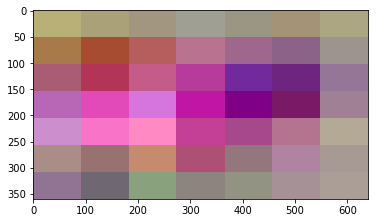

In [332]:
plt.imshow(cm, cmap="cool")



In [333]:
testpred = model.predict_generator(test, len(test.filenames) / batch_size)


AttributeError: 'tuple' object has no attribute 'shape'

In [ ]:
train_val, train_lab = train.next()
for i in range(len(train.filenames) // batch_size - 1):
    val, lab = train.next()
    train_val = np.concatenate([train_val,val])
    train_lab = np.concatenate([train_lab,lab])

In [ ]:
train_val.shape

In [ ]:
test_array = np.concatenate([test.next() for i in range(len(test.filenames) // batch_size)])

In [ ]:
testpred.shape()